In [11]:
import os
import requests
from dotenv import load_dotenv
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

load_dotenv()
av_token = os.getenv('AV_TOKEN')

In [ ]:
# Stock Ticker Symbol
symbol = 'AAPL'

url = f'https://www.alphavantage.co/query?function=INCOME_STATEMENT&symbol={symbol}&apikey={av_token}'
r = requests.get(url)
data = r.json()
data

{'symbol': 'AAPL',
 'annualReports': [{'fiscalDateEnding': '2024-09-30',
   'reportedCurrency': 'USD',
   'grossProfit': '180683000000',
   'totalRevenue': '391035000000',
   'costOfRevenue': '210352000000',
   'costofGoodsAndServicesSold': '210352000000',
   'operatingIncome': '123216000000',
   'sellingGeneralAndAdministrative': '26097000000',
   'researchAndDevelopment': '31370000000',
   'operatingExpenses': '57467000000',
   'investmentIncomeNet': 'None',
   'netInterestIncome': '0',
   'interestIncome': '0',
   'interestExpense': '0',
   'nonInterestIncome': 'None',
   'otherNonOperatingIncome': 'None',
   'depreciation': 'None',
   'depreciationAndAmortization': '11445000000',
   'incomeBeforeTax': '123485000000',
   'incomeTaxExpense': '29749000000',
   'interestAndDebtExpense': 'None',
   'netIncomeFromContinuingOperations': '93736000000',
   'comprehensiveIncomeNetOfTax': 'None',
   'ebit': '123216000000',
   'ebitda': '134661000000',
   'netIncome': '93736000000'},
  {'fisca

In [6]:
income_df = pd.DataFrame(data['annualReports'])
income_df

,fiscalDateEnding,reportedCurrency,grossProfit,totalRevenue,costOfRevenue,costofGoodsAndServicesSold,operatingIncome,sellingGeneralAndAdministrative,researchAndDevelopment,operatingExpenses,...,depreciation,depreciationAndAmortization,incomeBeforeTax,incomeTaxExpense,interestAndDebtExpense,netIncomeFromContinuingOperations,comprehensiveIncomeNetOfTax,ebit,ebitda,netIncome
0,2024-09-30,USD,180683000000,391035000000,210352000000,210352000000,123216000000,26097000000,31370000000,57467000000,...,None,11445000000,123485000000,29749000000,None,93736000000,None,123216000000,134661000000,93736000000
1,2023-09-30,USD,169148000000,383285000000,214137000000,214137000000,114301000000,24932000000,29915000000,54847000000,...,None,11519000000,113736000000,16741000000,None,96995000000,None,114301000000,125820000000,96995000000
2,2022-09-30,USD,170782000000,394328000000,223546000000,223546000000,119437000000,25094000000,26251000000,51573000000,...,None,11104000000,119103000000,19300000000,None,99803000000,None,119437000000,130541000000,99803000000
3,2021-09-30,USD,152836000000,365817000000,212981000000,212981000000,108949000000,21973000000,21914000000,43887000000,...,None,11284000000,109207000000,14527000000,None,94680000000,None,111852000000,123136000000,94680000000
4,2020-09-30,USD,104956000000,274515000000,169559000000,169559000000,66288000000,19916000000,18752000000,38668000000,...,None,11056000000,67091000000,9680000000,None,57411000000,None,69964000000,81020000000,57411000000
5,2019-09-30,USD,98392000000,260174000000,161782000000,161782000000,63930000000,18245000000,16217000000,34462000000,...,None,12547000000,65737000000,10481000000,None,55256000000,None,69313000000,81860000000,55256000000
6,2018-09-30,USD,101839000000,265595000000,163756000000,163756000000,70898000000,16705000000,14236000000,30941000000,...,None,10903000000,72903000000,13372000000,None,59531000000,None,76143000000,87046000000,59531000000
7,2017-09-30,USD,88186000000,229234000000,141048000000,141048000000,61344000000,15261000000,11581000000,26842000000,...,None,9400000000,64089000000,15738000000,None,48351000000,None,66412000000,75812000000,48351000000
8,2016-09-30,USD,84263000000,215639000000,131376000000,131376000000,60024000000,14194000000,10045000000,24239000000,...,None,9800000000,61372000000,15685000000,None,45687000000,None,62828000000,72628000000,45687000000
9,2015-09-30,USD,93626000000,233715000000,140089000000,140089000000,71230000000,14329000000,8067000000,22396000000,...,None,11257000000,72515000000,19121000000,None,53394000000,None,72491000000,83748000000,53394000000


In [7]:
income_df['fiscalDateEnding'] = pd.to_datetime(income_df['fiscalDateEnding'])
income_df['fiscalYear'] = income_df['fiscalDateEnding'].dt.year
cols_to_float = ['grossProfit', 'totalRevenue',
       'costOfRevenue', 'costofGoodsAndServicesSold', 'operatingIncome',
       'sellingGeneralAndAdministrative', 'researchAndDevelopment',
       'operatingExpenses', 'investmentIncomeNet', 'netInterestIncome',
       'interestIncome', 'interestExpense', 'nonInterestIncome',
       'otherNonOperatingIncome', 'depreciation',
       'depreciationAndAmortization', 'incomeBeforeTax', 'incomeTaxExpense',
       'interestAndDebtExpense', 'netIncomeFromContinuingOperations',
       'comprehensiveIncomeNetOfTax', 'ebit', 'ebitda', 'netIncome']

income_df[cols_to_float] = income_df[cols_to_float].apply(pd.to_numeric, errors='coerce')
income_df = income_df.sort_values(by='fiscalYear', ascending=True)
income_df

,fiscalDateEnding,reportedCurrency,grossProfit,totalRevenue,costOfRevenue,costofGoodsAndServicesSold,operatingIncome,sellingGeneralAndAdministrative,researchAndDevelopment,operatingExpenses,...,depreciationAndAmortization,incomeBeforeTax,incomeTaxExpense,interestAndDebtExpense,netIncomeFromContinuingOperations,comprehensiveIncomeNetOfTax,ebit,ebitda,netIncome,fiscalYear
19,2005-09-30,USD,4042000000,13931000000,9889000000,9889000000,1643000000,1859000000,535000000,2399000000,...,179000000,1815000000,480000000,NaN,NaN,NaN,1643000000,1822000000,1328000000,2005
18,2006-09-30,USD,5598000000,19315000000,13717000000,13717000000,2453000000,2433000000,712000000,3145000000,...,225000000,2818000000,829000000,NaN,NaN,NaN,2453000000,2678000000,1989000000,2006
17,2007-09-30,USD,8154000000,24006000000,15852000000,15852000000,4409000000,2963000000,782000000,3745000000,...,317000000,5008000000,1512000000,NaN,NaN,NaN,4407000000,4724000000,3495000000,2007
16,2008-09-30,USD,11145000000,32479000000,21334000000,21334000000,6275000000,3761000000,1109000000,4870000000,...,496000000,6895000000,2061000000,NaN,NaN,NaN,6808000000,7304000000,4834000000,2008
15,2009-09-30,USD,17222000000,42905000000,25683000000,25683000000,11370000000,4149000000,1333000000,5482000000,...,734000000,12066000000,3831000000,NaN,8.235000e+09,NaN,11991000000,12725000000,8235000000,2009
14,2010-09-30,USD,25684000000,65225000000,39541000000,39541000000,18270000000,5517000000,1782000000,7299000000,...,1027000000,18540000000,4527000000,NaN,1.401300e+10,NaN,18397000000,19424000000,14013000000,2010
13,2011-09-30,USD,44522000000,108249000000,64431000000,64431000000,34494000000,7599000000,2429000000,10028000000,...,1814000000,34205000000,8283000000,NaN,2.592200e+10,NaN,34183000000,35997000000,25922000000,2011
12,2012-09-30,USD,68662000000,156508000000,87846000000,87846000000,55241000000,9040000000,3381000000,13421000000,...,3277000000,55763000000,14030000000,NaN,4.173300e+10,NaN,55691000000,58968000000,41733000000,2012
11,2013-09-30,USD,64304000000,170910000000,106606000000,106606000000,48999000000,9730000000,4475000000,15305000000,...,6757000000,50155000000,13118000000,NaN,3.703700e+10,NaN,50294000000,57051000000,37037000000,2013
10,2014-09-30,USD,70537000000,182795000000,112258000000,112258000000,52503000000,11993000000,6041000000,18034000000,...,7946000000,53483000000,13973000000,NaN,3.951000e+10,NaN,53921000000,61867000000,39510000000,2014


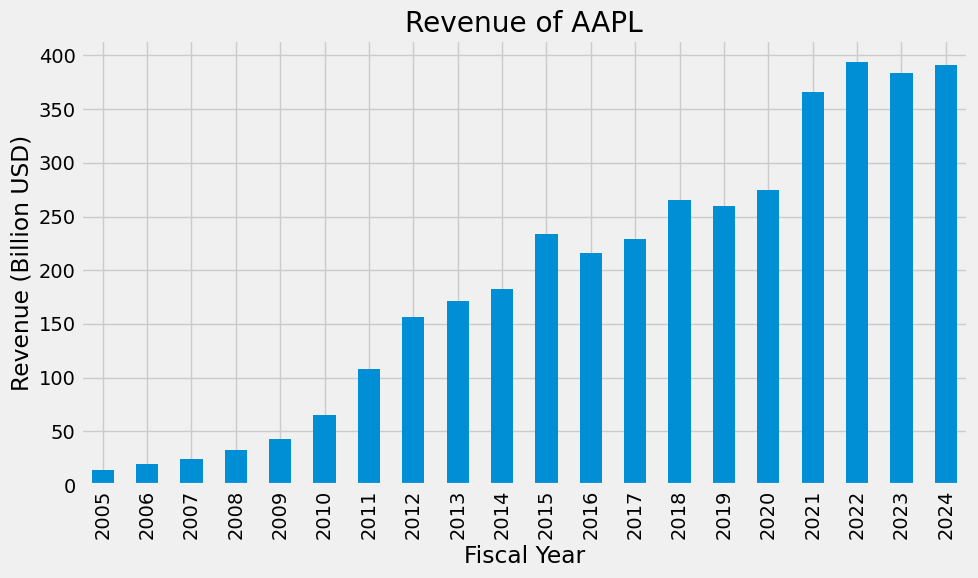

In [15]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(10, 6))
income_df.plot(
    x='fiscalYear',
    y='totalRevenue',
    kind='bar',
    ax=ax,
    title=f'Revenue of {symbol}',
    ylabel='Revenue (Billion USD)',
    xlabel='Fiscal Year',
    legend=False
)

# Format y-axis to billions
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1e9:.0f}'))

plt.tight_layout()
plt.show()